In [30]:
import keras
from keras.models import load_model

# Load the saved model
model = load_model("mushroom_model.keras")

print("Model loaded successfully!")
print(f"Model type: {type(model)}")
model.summary()

Model loaded successfully!
Model type: <class 'keras.src.models.sequential.Sequential'>


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 215)            │        27,735 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,833,095 (10.81 MB)

 Trainable params: 191,703 (748.84 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 383,408 (1.46 MB)

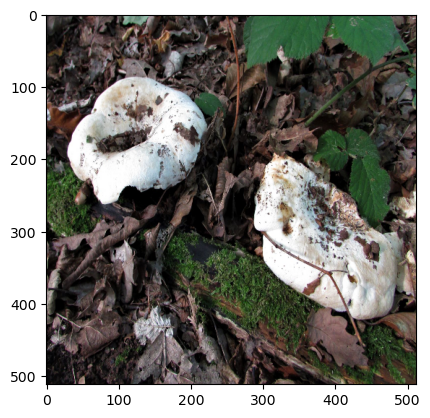

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class index: 68
Predicted class name: fleecy_milkcap
Confidence: 54.49%


In [31]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Get class names from data folder (same order as during training)
data_dir = "data"
class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
    
# Example: Load and predict on a single image
img_path = "data/fleecy_milkcap/6.png"

img = Image.open(img_path)
img = img.convert('RGB')  # Convert to RGB (3 channels)
plt.imshow(img)
plt.show()
img = img.resize((128, 128))

# Convert to array and add batch dimension
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

print(f"Predicted class index: {predicted_class}")
print(f"Predicted class name: {class_names[predicted_class]}")
print(f"Confidence: {predictions[0][predicted_class]:.2%}")

In [32]:
# Test model accuracy on the entire dataset
import tensorflow as tf

# Load the full dataset (no split)
test_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(128, 128),
    batch_size=64,
    shuffle=False
)

# Evaluate the model
loss, accuracy = model.evaluate(test_ds)
print(f"\nOverall Accuracy: {accuracy:.2%}")
print(f"Overall Loss: {loss:.4f}")

Found 3122 files belonging to 215 classes.
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.7076 - loss: 1.3290

Overall Accuracy: 70.76%
Overall Loss: 1.3290


In [33]:
# Optional: Get detailed per-class accuracy with confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions for all images
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

# Calculate per-class accuracy
cm = confusion_matrix(y_true, y_pred)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

print("\nPer-class Accuracy:")
for i, (name, acc) in enumerate(zip(class_names, per_class_accuracy)):
    print(f"{name}: {acc:.2%}")


Classification Report:
                          precision    recall  f1-score   support

         almond_mushroom       0.88      0.58      0.70        12
         amanita_gemmata       0.41      0.73      0.52        15
    amethyst_chanterelle       0.78      0.47      0.58        15
       amethyst_deceiver       0.91      0.67      0.77        15
          aniseed_funnel       0.80      0.80      0.80        15
               ascot_hat       0.79      0.73      0.76        15
              bay_bolete       0.69      0.60      0.64        15
         bearded_milkcap       0.50      0.53      0.52        15
      beechwood_sickener       0.91      0.67      0.77        15
        beefsteak_fungus       0.86      0.80      0.83        15
          birch_polypore       0.64      0.60      0.62        15
          birch_woodwart       0.67      1.00      0.80        12
     bitter_beech_bolete       0.60      0.80      0.69        15
           bitter_bolete       0.56      0.67      

2026-02-02 00:53:28.948861: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
